# Homework 3: Modeling of volume change with iron in ferropericlase (Mg,Fe)O

### Project implementation
### by Luisa Chavarria

## Contents
- [Objective](#objective)
- [Instructions](#instructions)
- [1. Import modules and libraries](#1-import-modules-and-libraries)
- [2. Upload the data and check validity](#2-upload-the-data-and-check-validity)
- [3. Linear model - Least Squares Fit](#3-linear-model---least-squares-fit)
- [4. Vegard's Law](#4-vegard's-law)
- [5. Compare LSF vs Vegard's Law](#5-compare-lsf-vs-vegard's-law)
- [6. Visualize change of volume in the unit cell](#6-visualize-change-of-volume-in-the-unit-cell)
- [7. Calculate the iron concentration based on the volume](#7-calculate-the-iron-concentration-based-on-the-volume)
- [8. Linting ](#8-linting)
- [9. References and Sources](#8-references-and-sources)


## Objective

This project looks to model the volume change of the mineral ferropericlase (Mg,Fe)O when there is a variation in the concentration of iron. 



## Instructions

This notebook integrates the modules developed for: check data validity, calculate the linear model, the Vegard's law, compare both models, visualize the change of volume in the unit cell, and calculate the iron concentration based on the volume. 

Upload the "Fe_volume_fp.csv" file to run the data of volumes and concentrations of iron in ferropericlase. 



## 1. Import modules and libraries

In [28]:
## 1. Import Required Libraries and Modules

# Libraries

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit 
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Modules

from data_validator import check_data_validity
from linear_lsf import linear_model
from linear_lsf import fit_and_plot_linear_model
from vegards_law import run_analysis
from comparison import compare_models
from generator import generate_atoms
from volume_unitcell import create_plots
from fe_calculation import estimate_fe





## 2. Upload the data and check validity 



In [29]:
# Load data from a CSV

fp = pd.read_csv('Fe_volume_fp.csv') 

# Print the table with the data 

print(tabulate(fp, headers='keys', tablefmt='grid'))

# Extract Fe fraction and unit cell volume data and convert to Numpy arrays

x = fp['Fe_fraction'].to_numpy()        # Fe is expressed as a fraction 
V = fp['Volume_UnitCell'].to_numpy()    # Volume is in angstrom (A^3)

# Validate the data

check_data_validity(x, V)


+----+--------+-----------------+---------------+-------------------+-------------------------------+--------------+
|    | Name   |   Fe_percentage |   Fe_fraction |   Volume_UnitCell | Reference                     |   Unnamed: 5 |
+====+========+=================+===============+===================+===============================+==============+
|  0 | MgO    |             0   |         0     |            74.99  | Hazen (1976)                  |          nan |
+----+--------+-----------------+---------------+-------------------+-------------------------------+--------------+
|  1 | MgO    |             0   |         0     |            74.69  | Boiocchi et al (2001)         |          nan |
+----+--------+-----------------+---------------+-------------------+-------------------------------+--------------+
|  2 | Fp2.6  |             2.6 |         0.026 |            74.91  | Boiocchi et al (2001)         |          nan |
+----+--------+-----------------+---------------+---------------

## 3. Linear model - Least Squares Fit 

This module includes the linear model function and the fitting/plotting  code


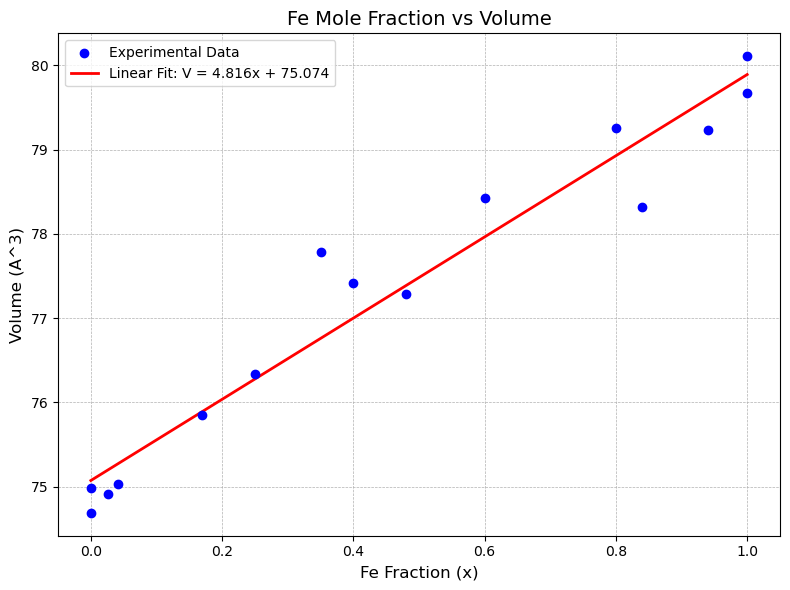

Fitted parameters: a = 4.816, b = 75.074
Linear Fit: V = 4.816x + 75.074


(4.81622449074235, 75.07397889752396)

In [30]:
# Run fit_and_plot_linear_model module using x and V as parameters from the linear_lsf.py module

fit_and_plot_linear_model(x, V)


## 4. Vegard's Law


 Vegard's Law Fit:
   V(x) = 4.8162 * x + 75.0740
   Extrapolated V_FeO (x=1): 79.8902 Å³
   Extrapolated V_MgO (x=0): 75.0740 Å³


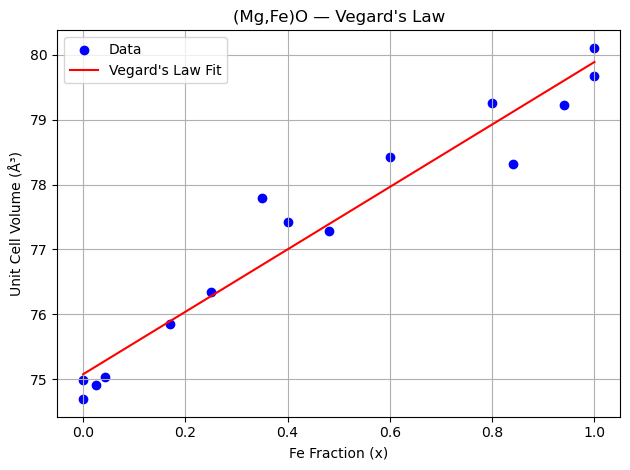

(LinearRegression(), 79.89020341080598, 75.07397887833379)

In [31]:
# From the module vegards_law.py use run_analysis with the parameters x and V to calculate the linear regression corresponding to the Vegard's Law using the data for ferropericlase

run_analysis(x, V, plot=True)

# 5. Compare LSF vs Vegard's Law


Fitted Vegard's Law parameters: V_MgO = 75.0740, V_FeO = 79.8902
Fitted Least Squares parameters: a = 4.8162, b = 75.0740


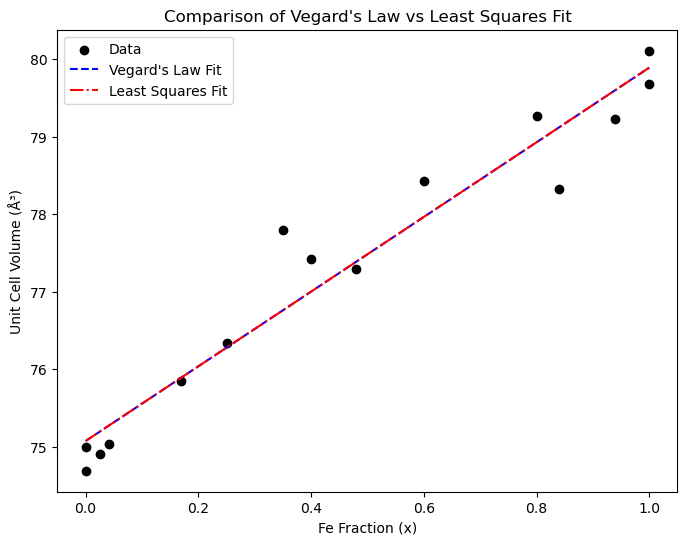

In [32]:
compare_models(x,V)

## 6. Visualize change of volume in the unit cell

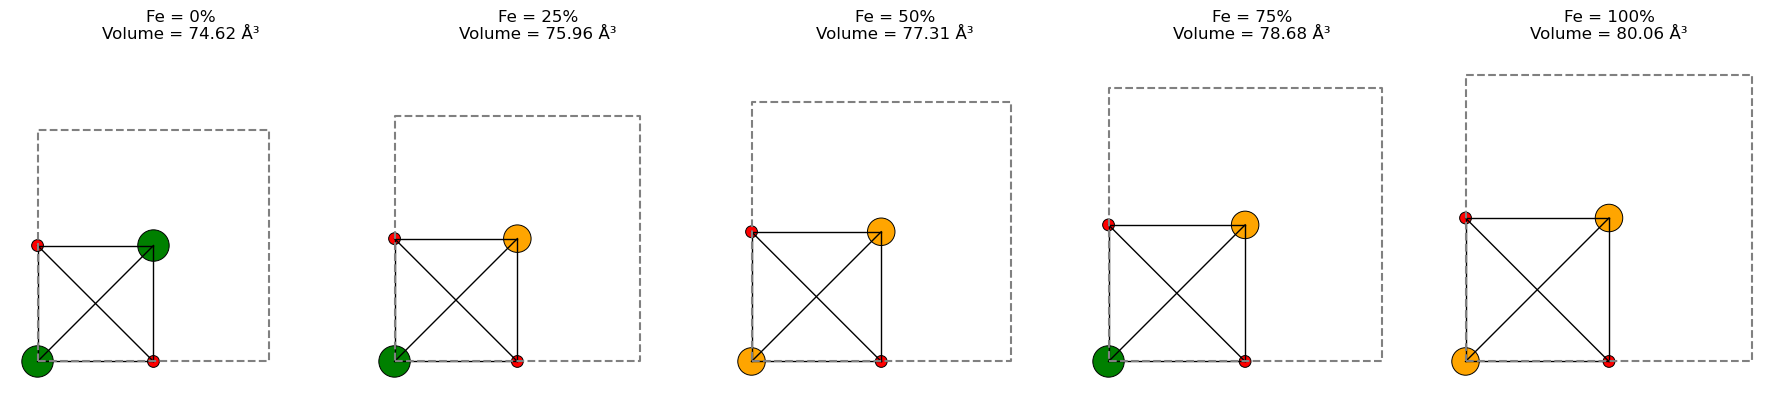

In [33]:
# Visualize the change of volume according to the concentration of iron. Use the module volume_unitcell.py

#Module to generate 2D visualizations of atomic configurations  in (Mg,Fe)O solid solutions. Atom positions and bond networks 
# are plotted for different Fe mole fractions, with visual exaggeration to highlight structural differences.

fe_fractions = [0.0, 0.25, 0.50, 0.75, 1.0]  # Concentrations of iron 

create_plots(fe_fractions)  # Create plots of the unit cell according to the iron concentration


## 7. Calculate the iron concentration based on the volume

In [34]:
# Based on the least squared fit model, calculate the iron concentration based on the volume provided from XRD data. 

sample1= estimate_fe (76.42)



For the volume = 76.42 Å³, the estimated Fe concentration is 27.95%


## 8. Linting

In [35]:
# Flake8 on comparison.py
!flake8 comparison.py --count


comparison.py:90:80: E501 line too long (94 > 79 characters)
1


In [36]:
# Flake8 on data_validator.py
!flake8 data_validator.py --count


data_validator.py:15:1: E302 expected 2 blank lines, found 1
data_validator.py:46:80: E501 line too long (131 > 79 characters)
data_validator.py:47:80: E501 line too long (126 > 79 characters)
3


In [37]:
# Flake8 on fe_calculation.py
!flake8 fe_calculation.py --count


fe_calculation.py:36:80: E501 line too long (80 > 79 characters)
1


In [38]:
# Flake8 on generator.py
!flake8 generator.py --count


generator.py:32:80: E501 line too long (81 > 79 characters)
1


In [39]:
# Flake8 on linear_lsf.py
!flake8 linear_lsf.py --count


linear_lsf.py:4:80: W291 trailing whitespace
linear_lsf.py:80:1: W293 blank line contains whitespace
2


In [40]:
# Flake8 on vegards_law.py
!flake8 vegards_law.py --count


vegards_law.py:2:80: E501 line too long (80 > 79 characters)
vegards_law.py:3:80: E501 line too long (82 > 79 characters)
vegards_law.py:12:1: F401 'numpy as np' imported but unused
vegards_law.py:46:11: F541 f-string is missing placeholders
vegards_law.py:69:80: E501 line too long (81 > 79 characters)
5


In [41]:
# Flake8 on volume_unitcell.py
!flake8 volume_unitcell.py --count


volume_unitcell.py:13:80: E501 line too long (84 > 79 characters)
volume_unitcell.py:17:80: E501 line too long (83 > 79 characters)
volume_unitcell.py:18:1: E731 do not assign a lambda expression, use a def
volume_unitcell.py:18:80: E501 line too long (81 > 79 characters)
volume_unitcell.py:56:80: E501 line too long (85 > 79 characters)
5


## 9. References and Sources

List any papers, books, websites, or other resources you've consulted or plan to use for your project. Use proper citation format.


Websites:


2. OpenAI. ChatGPT. April 16, 2025. OpenAI. https://chat.openai.com. (Planning and coding of the project)

